In [226]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 3)

## Se obtienen los valores de las ventas de autos de Noruega

- Year - year of sales 
- Month - month of sales
- Quantity - total number of units sold
- Quantity_YoY - change YoY in units
- Import - total number of units imported (used cars)
- Import_YoY - change YoY in units
- Used - total number of units owner changes inside the country (data available from 2012)
- Used_YoY - change YoY in units
- Avg_CO2 - average CO2 emission of all cars sold in a given month (in g/km)
- Bensin_CO2 - average CO2 emission of bensin-fueled cars sold in a given month (in g/km)
- Diesel_CO2 - average CO2 emission of diesel-fueled cars sold in a given month (in g/km)
- Quantity_Diesel - number of diesel-fueled cars sold in the country in a given month
- DieselShare - share of diesel cars in total sales (QuantityDiesel / Quantity)
- DieselShareLY - share of diesel cars in total sales a year ago
- Quantity_Hybrid - number of new hybrid cars sold in the country (both PHEV and BV)
- Quantity_Electric - number of new electric cars sold in the country (zero emission vehicles)
- Import_Electric - number of used electric cars imported to the country (zero emission vehicles)

In [227]:
df_car_sales_norway = pd.read_csv(r'.\norway_new_car_sales_by_month.csv')
df_car_sales_norway.columns
df_car_sales_norway.head(3)
ym = df_car_sales_norway.apply(lambda x: str(int(x['Year']))+str(int(x['Month'])) ,axis=1)
df_car_sales_norway['yyyymm'] = ym
df_car_sales_norway.head(3)

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,yyyymm
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN,20071
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN,20072
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN,20073


In [228]:
df_car_sales_norway[['Year','Month']].groupby(['Year']).count()

,Month
Year,
2007,12
...,...
2017,1


In [229]:
# Se puede ver que el año 2017 solo tiene un mes, se va a filtrar solo hasta el 2016
df_car_sales_norway = df_car_sales_norway.loc[df_car_sales_norway['Year']<2017,:]

In [230]:
sales = df_car_sales_norway[['yyyymm','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']].groupby(['yyyymm']).sum()
sales.head(3)

,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
yyyymm,,,
20071,0.0,0.0,10072
200710,0.0,0.0,8967
200711,0.0,0.0,7683


<AxesSubplot:xlabel='yyyymm'>

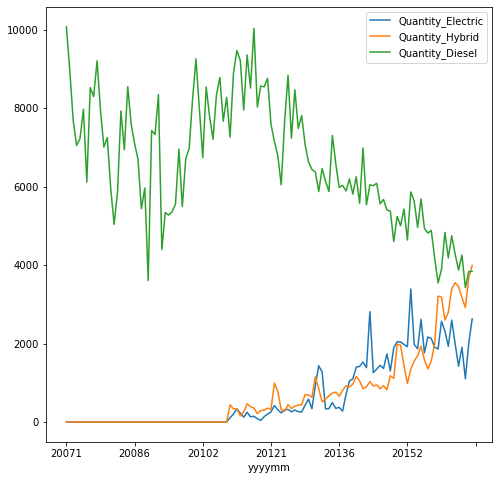

In [231]:
sales.plot(figsize=(8, 8))

## Se obtienen los valores de polución de Oslo

In [232]:
# Fuente: https://luftkvalitet.nilu.no/historikk

# Medidas en µg/m³
norway_pollution = pd.read_csv(r'.\norway_pollution.csv',sep=';', decimal=",")
cols = ['Date','NO','Coverage_NO','NO2','Coverage_NO2','NOx','Coverage_NOx','PM1','Coverage_PM1','PM10','Coverage_PM10','PM2.5','Coverage_PM2.5']
norway_pollution.columns = cols

norway_pollution['Date'] = norway_pollution['Date'].apply(lambda x: str(x).replace('.','-'))
norway_pollution['Date'] = pd.to_datetime(norway_pollution['Date'],format='%d-%m-%Y %H:%M') 

norway_pollution['Year'] = pd.DatetimeIndex(norway_pollution['Date']).year
norway_pollution['Month'] = pd.DatetimeIndex(norway_pollution['Date']).month

norway_pollution['NO'].astype(float)
norway_pollution['NO2'].astype(float)
norway_pollution['NOx'].astype(float)
norway_pollution['PM1'].astype(float)
norway_pollution['PM10'].astype(float)
norway_pollution['PM2.5'].astype(float)

ym = norway_pollution.apply(lambda x: str(int(x['Year']))+str(int(x['Month'])) ,axis=1)
norway_pollution['yyyymm'] = ym

norway_pollution.head(3)

,Date,NO,Coverage_NO,NO2,Coverage_NO2,NOx,Coverage_NOx,PM1,Coverage_PM1,PM10,Coverage_PM10,PM2.5,Coverage_PM2.5,Year,Month,yyyymm
0,2007-01-01,158.513704,99,69.664315,99.0,311.881954,99,NaN,NaN,36.213315,99.0,21.339237,99.0,2007,1,20071
1,2007-02-01,92.943563,99,53.958982,99.0,195.968862,99,NaN,NaN,25.469173,99.0,16.278195,99.0,2007,2,20072
2,2007-03-01,64.818805,76,52.085589,76.0,151.148682,76,NaN,NaN,49.421622,99.0,NaN,32.0,2007,3,20073


In [233]:
norway_pollution[['Year','Month']].groupby(['Year']).count()

,Month
Year,
2007,12
...,...
2018,12


In [234]:
# Al igual que el anterior, se va a filtrar solo hasta el 2016
norway_pollution = norway_pollution.loc[norway_pollution['Year']<2017,:]

In [235]:
df_pollutant = norway_pollution[['yyyymm','NO','NO2','NOx','PM1','PM10','PM2.5']]
df_pollutant = df_pollutant.groupby(['yyyymm']).mean() 
df_pollutant = df_pollutant.fillna(0)
df_pollutant.head(3)

,NO,NO2,NOx,PM1,PM10,PM2.5
yyyymm,,,,,,
20071,158.513704,69.664315,311.881954,0.0,36.213315,21.339237
200710,83.067935,47.385734,174.311821,0.0,27.250720,12.427754
200711,131.184344,59.166291,259.618054,0.0,34.085554,14.652720


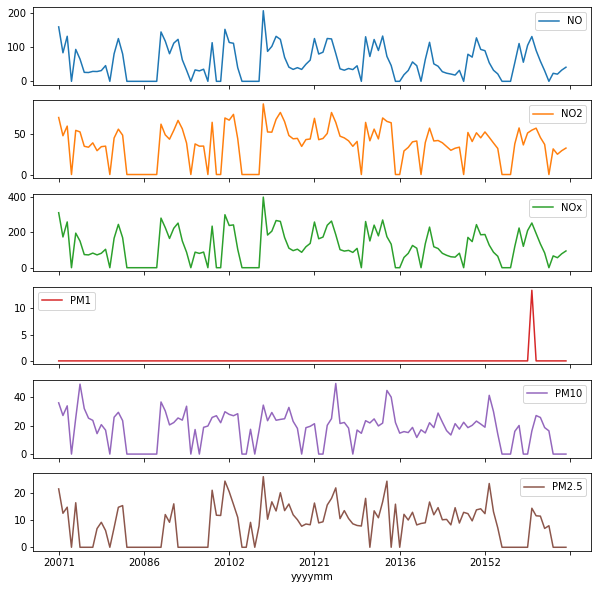

In [236]:
df_pollutant.plot(subplots=True, figsize=(10, 10));

## Se juntan los datasets

In [260]:
df_all = norway_pollution.merge(df_car_sales_norway, how='inner', left_on=['Year'],right_on=['Year'])


df_all = df_all[['Year','NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']]
df_all = df_all.fillna(0)
df_all.head(3)

,Year,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
0,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,10072
1,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,7222
2,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,7965


In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

val_to_scaler = df_all[['NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']]
scaler.fit(val_to_scaler)
vals = scaler.transform(val_to_scaler)

df_scaled = pd.DataFrame(vals)
df_scaled.columns = ['NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']
df_scaled.insert(0,'Year',df_all['Year'])
df_scaled


,Year,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
0,2007,2.201182,1.438954,2.060623,1.500093,1.803268,-0.783322,-0.749201,2.205481
...,...,...,...,...,...,...,...,...,...
1439,2016,1.603944,0.771195,1.432430,-0.153092,0.806241,1.876466,1.927965,-1.133243


In [262]:
df_pollutant_sales = df_scaled.groupby(['Year']).mean() 
df_pollutant_sales.head(3)


,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
Year,,,,,,,,
2007,0.098799,0.179070,0.121003,0.607922,-0.186554,-0.783322,-0.749201,0.888002
2008,-0.667847,-1.041929,-0.775845,-0.965431,-0.771308,-0.783322,-0.749201,0.052313
2009,0.190577,0.134485,0.180871,0.216992,-0.772030,-0.783322,-0.749201,-0.401033


<AxesSubplot:xlabel='Year'>

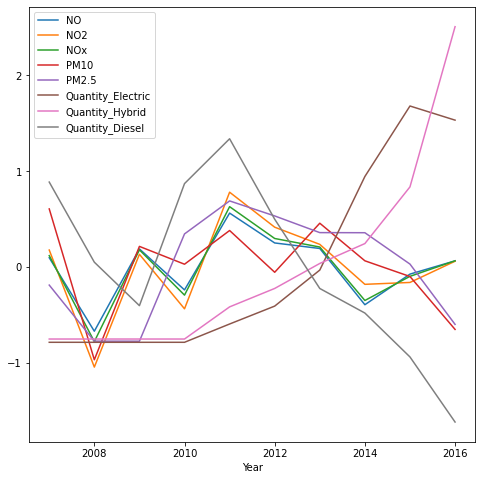

In [263]:
df_pollutant_sales.plot(figsize=(8, 8))